#Solution to F Module (Qauntum Fourier Transform) of Xanadu CodeBook

In [1]:
!pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.7 MB/s eta 0:00:00


In [2]:
import pennylane as qml
import numpy as np

## F.1 Changing Perspectives

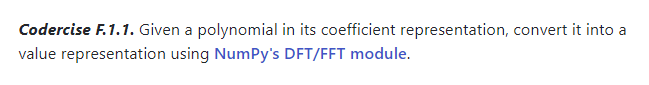

In [3]:
def coefficients_to_values(coefficients):
    """Returns the value representation of a polynomial
    
    Args:
        coefficients (array[complex]): a 1-D array of complex 
            coefficients of a polynomial with 
            index i representing the i-th degree coefficient

    Returns: 
        array[complex]: the value representation of the 
            polynomial 
    """
    ##################
    # YOUR CODE HERE #
    
    ################## 
    return np.fft.fft(coefficients)

A = [4, 3, 2, 1]
print(coefficients_to_values(A))


[10.+0.j  2.-2.j  2.+0.j  2.+2.j]


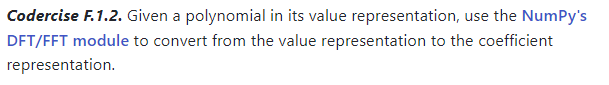

In [4]:
def values_to_coefficients(values):
    """Returns the coefficient representation of a polynomial
    
    Args:
        values (array[complex]): a 1-D complex array with 
            the value representation of a polynomial 

    Returns: 
        array[complex]: a 1-D complex array of coefficients
    """
    
    ##################
    # YOUR CODE HERE #
    ################## 
    return np.fft.ifft(values)


A = [10.+0.j,  2.-2.j,  2.+0.j,  2.+2.j]
print(values_to_coefficients(A))


[4.+0.j 3.+0.j 2.+0.j 1.+0.j]


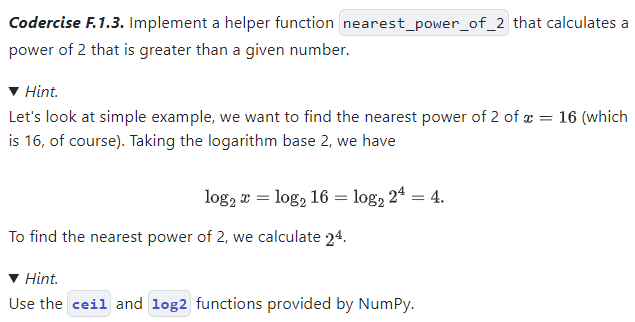

In [6]:
def nearest_power_of_2(x):
    """Given an integer, return the nearest power of 2. 
    
    Args:
        x (int): a positive integer

    Returns: 
        int: the nearest power of 2 of x
    """
    ##################
    # YOUR CODE HERE #
    if  x == 0:
       res = 1
    else: 
        res = int(2**np.ceil(np.log2(x)))
    ################## 
    
    
    return res


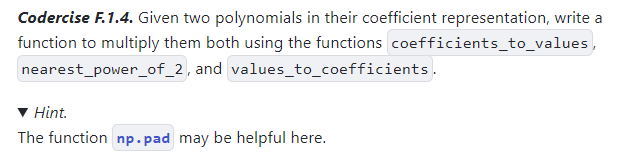

In [7]:
def fft_multiplication(poly_a, poly_b):
    """Returns the result of multiplying two polynomials
    
    Args:
        poly_a (array[complex]): 1-D array of coefficients 
        poly_b (array[complex]): 1-D array of coefficients 

    Returns: 
        array[complex]: complex coefficients of the product
            of the polynomials
    """
    ##################
    # YOUR CODE HERE #
    ################## 

    # Calculate the number of values required
    num_val = (len(poly_a)) + (len(poly_b)) - 1
    # Figure out the nearest power of 2
    n=nearest_power_of_2(num_val)
    # Pad zeros to the polynomial
    poly_a = np.pad(poly_a, (0,n-len(poly_a)))
    poly_b = np.pad(poly_b, (0,n-len(poly_b)))
    # Convert the polynomials to value representation 
    values_a = coefficients_to_values(poly_a)    
    values_b = coefficients_to_values(poly_b)
    # Multiply
    mult = values_a * values_b
    # Convert back to coefficient representation
    poly_c= values_to_coefficients(mult)
    return poly_c


## F.2 Quantum Fourier transform

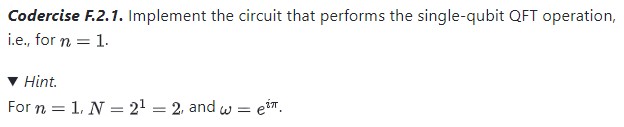

In [8]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def one_qubit_QFT(basis_id):
    """A circuit that computes the QFT on a single qubit. 
    
    Args:
        basis_id (int): An integer value identifying 
            the basis state to construct.
    
    Returns:
        array[complex]: The state of the qubit after applying QFT.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=dev.num_wires)]
    qml.BasisStatePreparation(bits, wires=[0])

    ##################
    # YOUR CODE HERE #
    qml.Hadamard(wires=0)
    ##################
    
    return qml.state()


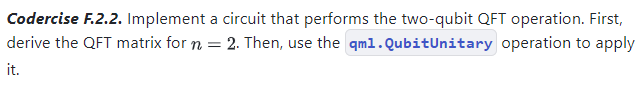

In [9]:
n_bits = 2
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def two_qubit_QFT(basis_id):
    """A circuit that computes the QFT on two qubits using qml.QubitUnitary. 
    
    Args:
        basis_id (int): An integer value identifying the basis state to construct.
    
    Returns:
        array[complex]: The state of the qubits after the QFT operation.
    """
    
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=dev.num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])
    
    ##################
    # YOUR CODE HERE #
    U = 0.5*(np.array([[1,1,1,1], [1, complex(0,1), -1, complex(0,-1)], [1, -1, 1, -1], [1, complex(0,-1), -1, complex(0,1)]]))
    qml.QubitUnitary(U, wires=[0,1])
    ##################
    
    return qml.state()


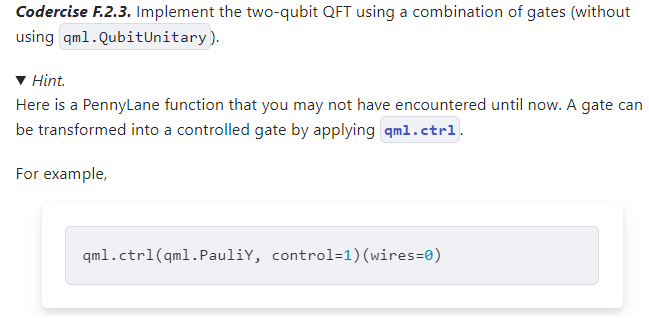

In [10]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def decompose_two_qubit_QFT(basis_id):
    """A circuit that computes the QFT on two qubits using elementary gates.
    
    Args:
        basis_id (int): An integer value identifying the basis state to construct.
    
    Returns:
        array[complex]: The state of the qubits after the QFT operation.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=dev.num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])
    
    ##################
    # YOUR CODE HERE #
    qml.Hadamard(wires=0)
    qml.ctrl(qml.S, control=1)(wires=0)
    qml.Hadamard(wires=1)
    qml.SWAP(wires=[0,1])
    ##################
    
    return qml.state()


## F.3 Connecting the dots

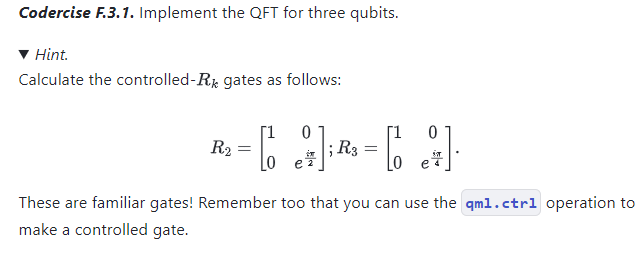

In [11]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def three_qubit_QFT(basis_id):
    """A circuit that computes the QFT on three qubits.
    
    Args:
        basis_id (int): An integer value identifying the basis state to construct.
        
    Returns:
        array[complex]: The state of the qubits after the QFT operation.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=dev.num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1, 2])
    
    ##################
    # YOUR CODE HERE #
    qml.Hadamard(wires=0)
    qml.ctrl(qml.S(wires=0), control=1)
    qml.ctrl(qml.T(wires=0), control=2)
    qml.Hadamard(wires=1)
    qml.ctrl(qml.S(wires=1), control=2)
    qml.Hadamard(wires=2)
    qml.SWAP(wires=[0,2])
    ################## 

    return qml.state()


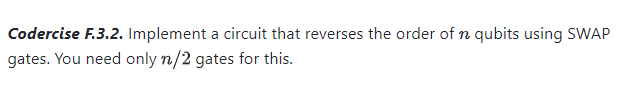

In [12]:
dev = qml.device('default.qubit', wires=4)

            
def swap_bits(n_qubits):
    """A circuit that reverses the order of qubits, i.e.,
    performs a SWAP such that [q1, q2, ..., qn] -> [qn, ... q2, q1].
    
    Args:
        n_qubits (int): An integer value identifying the number of qubits.
    """
    ##################
    # YOUR CODE HERE #
    for i in range(int(n_qubits/2)):
        qml.SWAP(wires=[i,n_qubits-1-i])
    ##################
    pass

@qml.qnode(dev) 
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisStatePreparation(bits, wires=range(n_qubits))
    # qft_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()


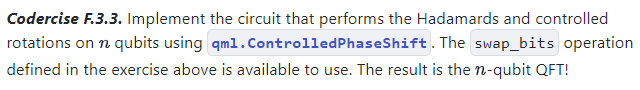

In [13]:
dev = qml.device('default.qubit', wires=4)

def qft_rotations(n_qubits):
    """A circuit performs the QFT rotations on the specified qubits.
    
    Args:
        n_qubits (int): An integer value identifying the number of qubits.
    """

    ##################
    # YOUR CODE HERE #
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
        for j in range(i+1,n_qubits,1):
            qml.ControlledPhaseShift(np.pi/(2**(j-i)), wires=[j,i])
    ################## 
    pass

@qml.qnode(dev) 
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisStatePreparation(bits, wires=range(n_qubits))
    qft_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()


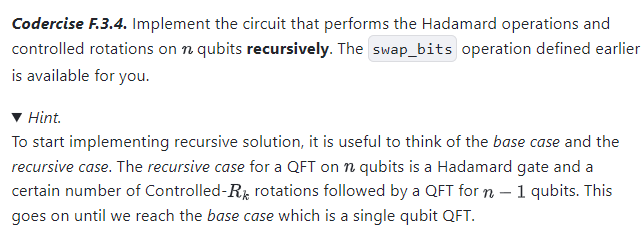

In [14]:
dev = qml.device('default.qubit', wires=4)

def qft_recursive_rotations(n_qubits, wire=0):
    """A circuit that performs the QFT rotations on the specified qubits
        recursively.
        
    Args:
        n_qubits (int): An integer value identifying the number of qubits.
        wire (int): An integer identifying the wire 
                    (or the qubit) to apply rotations on.
    """

    ##################
    # YOUR CODE HERE #
    if wire == n_qubits-1:
        qml.Hadamard(wires=wire)
    else:
        qml.Hadamard(wires=wire)
        for i in range(wire+1, n_qubits, 1):
            qml.ControlledPhaseShift(np.pi/(2**(i-wire)), wires=[i,wire])
        qft_recursive_rotations(n_qubits, wire+1)
    ################## 
    pass

@qml.qnode(dev) 
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisStatePreparation(bits, wires=range(n_qubits))
    qft_recursive_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()


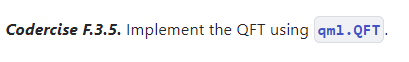

In [ ]:
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def pennylane_qft(basis_id, n_qubits):
    """A that circuit performs the QFT using PennyLane's QFT template.
    
    Args:
        basis_id (int): An integer value identifying 
            the basis state to construct.
        n_qubits (int): An integer identifying the 
            number of qubits.
            
    Returns:
        array[complex]: The state after applying the QFT to the qubits.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisStatePreparation(bits, wires=range(n_qubits))

    ##################
    # YOUR CODE HERE #
    qml.QFT(wires=range(n_qubits))
    
    ################## 
    return qml.state()
